In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=12,batch_size=32)

C:\Users\Mohammed Arif\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - loss: 0.0141
Epoch 2/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0022
Epoch 3/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0020
Epoch 4/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0019
Epoch 5/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0017
Epoch 6/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0018
Epoch 7/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 0.0017
Epoch 8/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0014
Epoch 9/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0016
Epoch 10/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0013
Epoch 11/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.0015
Epoch 12/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0012


In [13]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


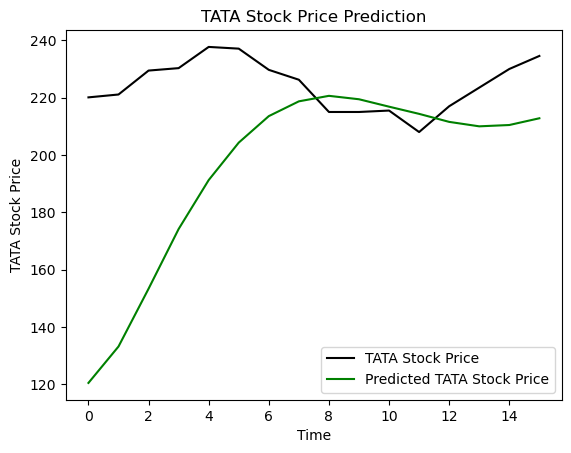

In [16]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()